In [1]:
# importing necessary dependencies

import pandas as pd
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error


In [2]:
data = pd.read_csv('../data/exchange_rate.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71990 entries, 0 to 71989
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           71990 non-null  object
 1   buying value   71990 non-null  object
 2   average value  71990 non-null  object
 3   selling value  71990 non-null  object
 4   date           71990 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB
None
  Code buying value average value selling value        date
0  AED   340.734852    344.141856    347.548861  12/29/2023
1  AOA      1.47855      1.493334      1.508118  12/29/2023
2  AUD    856.15765    864.718362    873.279074  12/29/2023
3  BIF     0.439248       0.44364      0.448032  12/29/2023
4  CAD   945.894335    955.352323    964.810311  12/29/2023


In [3]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [4]:
data['average value'] = data['average value'].str.replace(',', '').astype('float')
data['selling value'] = data['selling value'].str.replace(',', '').astype('float')

In [5]:
# Calculate the estimated buying value for all rows
estimated_buying_value_all = 2 * data['average value'] - data['selling value']

# Replace the invalid buying values with the estimated values for all rows
data['buying value'] = data['buying value'].fillna(estimated_buying_value_all)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71990 entries, 0 to 71989
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Code           71990 non-null  object        
 1   buying value   71990 non-null  object        
 2   average value  71990 non-null  float64       
 3   selling value  71990 non-null  float64       
 4   date           71990 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.7+ MB


In [7]:
# print(data.Code.value_counts().sort_values())
print(data.Code.nunique())

52


In [8]:
# subsetting my dataset to USD only

USD_exchange_rate = (data[data['Code'] == 'USD']
                     .reset_index()
                     .drop(columns=['index', 'Code', 'buying value', 'selling value'])
                     .set_index('date')
                     .squeeze()
                     .sort_index()
                     
                     )

In [9]:
USD_exchange_rate.info()
USD_exchange_rate.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1505 entries, 2017-12-01 to 2023-12-29
Series name: average value
Non-Null Count  Dtype  
--------------  -----  
1505 non-null   float64
dtypes: float64(1)
memory usage: 23.5 KB


date
2017-12-01    843.273321
2017-12-04    843.383553
2017-12-05    843.463553
2017-12-06    843.563554
2017-12-07    843.653767
Name: average value, dtype: float64

In [10]:
USD_exchange_rate.describe()

count    1505.000000
mean      978.820082
std       101.751179
min       843.273321
25%       895.333439
50%       970.260019
75%      1023.450000
max      1263.930000
Name: average value, dtype: float64

In [11]:
# fig, ax = plt.subplots(figsize=(15,6))
# USD_exchange_rate.hist(ax=ax)

In [12]:
# fig, ax = plt.subplots(figsize=(15, 6))
# USD_exchange_rate.plot(kind='box', vert=False, title='Distribution of the USD-to-RWF exchange rate', ax=ax)


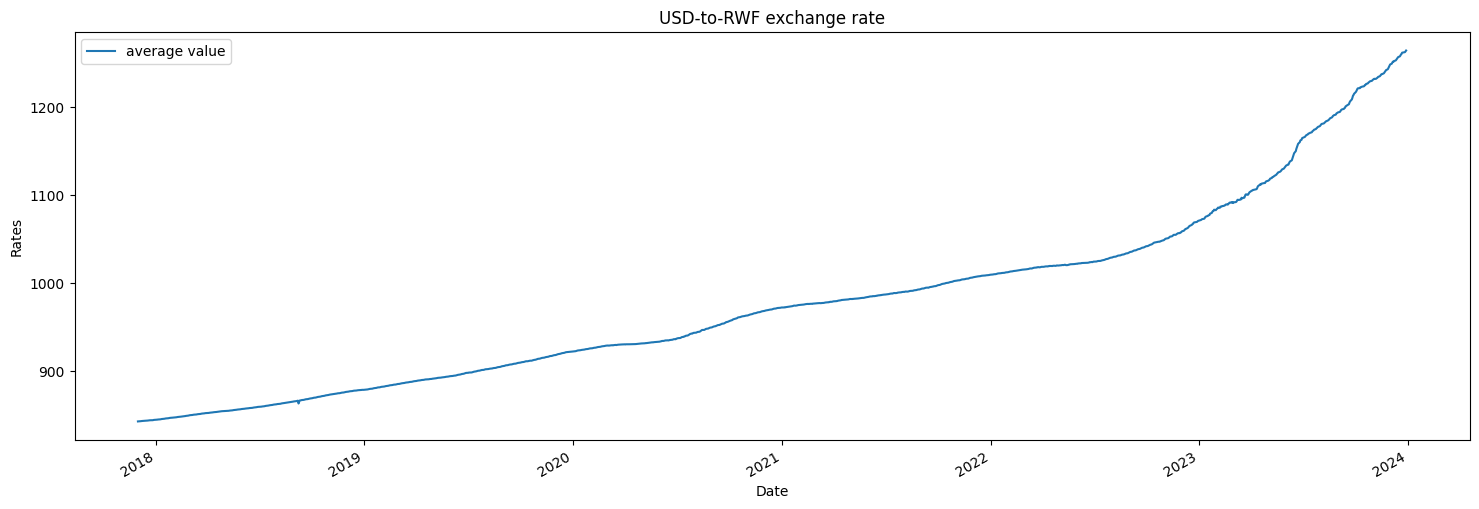

In [13]:
fig, ax = plt.subplots(figsize=(18, 6))
USD_exchange_rate.plot(xlabel='Date', ylabel='Rates', title='USD-to-RWF exchange rate',ax=ax)
plt.legend()

In [14]:
# Step 1: Detect and Remove Outliers using IQR
Q1 = USD_exchange_rate.quantile(0.25)
Q3 = USD_exchange_rate.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
USD_exchange_rate_clean = USD_exchange_rate[(USD_exchange_rate >= lower_bound) & (USD_exchange_rate <= upper_bound)]
USD_exchange_rate_clean

date
2017-12-01     843.273321
2017-12-04     843.383553
2017-12-05     843.463553
2017-12-06     843.563554
2017-12-07     843.653767
                 ...     
2023-09-25    1208.430000
2023-09-26    1210.250000
2023-09-27    1212.620000
2023-09-28    1213.520000
2023-09-29    1214.910000
Name: average value, Length: 1442, dtype: float64

In [35]:
var = np.var(USD_exchange_rate_clean)
var

7722.221812086254

<Axes: xlabel='average value'>

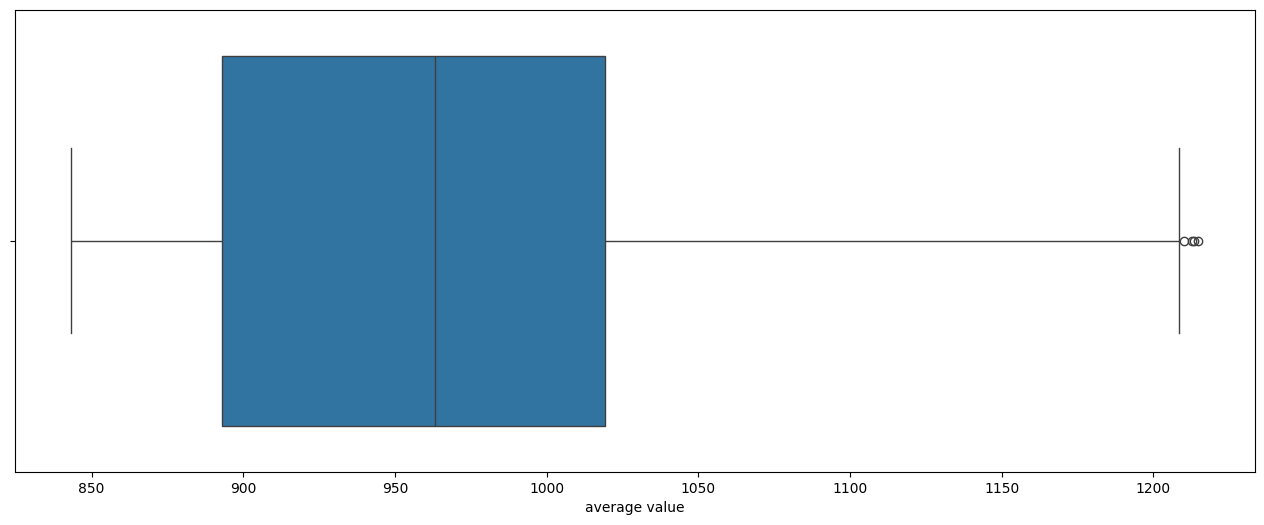

In [19]:
fig, ax=plt.subplots(figsize=(16,6))
sns.boxplot(USD_exchange_rate_clean, orient='h')

<Axes: >

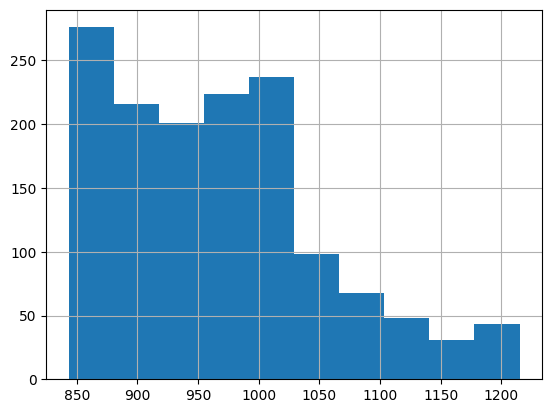

In [22]:
USD_exchange_rate_clean.hist()

In [21]:
import numpy as np

# Assuming 'USD_exchange_rate' is your time series data
# Calculate mean, median, variance, standard deviation, min, max, etc.
mean = np.mean(USD_exchange_rate)
median = np.median(USD_exchange_rate)
variance = np.var(USD_exchange_rate)
std_deviation = np.std(USD_exchange_rate)
skewness = USD_exchange_rate.skew()
minimum = np.min(USD_exchange_rate)
maximum = np.max(USD_exchange_rate)
percentiles = np.percentile(USD_exchange_rate, [25, 50, 75])  # 25th, 50th (median), and 75th percentiles

# Print the calculated statistics
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print('skewness:', skewness)
print("Minimum:", minimum)
print("Maximum:", maximum)
print("25th Percentile:", percentiles[0])
print("50th Percentile (Median):", percentiles[1])
print("75th Percentile:", percentiles[2])


Mean: 978.820081860465
Median: 970.260019
Variance: 10346.423133548686
Standard Deviation: 101.71736888825176
skewness: 0.8824728178992434
Minimum: 843.273321
Maximum: 1263.93
25th Percentile: 895.333439
50th Percentile (Median): 970.260019
75th Percentile: 1023.45


In [15]:
keys = {
    'Mean': mean,
    'median': median,
    'variance': variance,
    'Std.deviation': std_deviation,
    'skewness': skewness,
    "25th Percentile": percentiles[0],
    "50th Percentile (Median)": percentiles[1],
    "75th Percentile": percentiles[2]
}
keys

{'Mean': 978.820081860465,
 'median': 970.260019,
 'variance': 10346.423133548686,
 'Std.deviation': 101.71736888825176,
 'skewness': 0.8824728178992434,
 '25th Percentile': 895.333439,
 '50th Percentile (Median)': 970.260019,
 '75th Percentile': 1023.45}

In [22]:
# statistics = pd.DataFrame([keys])
statistics = pd.DataFrame.from_dict(keys, orient='index', columns=['Values'])
statistics

,Values
Mean,978.820082
median,970.260019
variance,10346.423134
Std.deviation,101.717369
skewness,0.882473
25th Percentile,895.333439
50th Percentile (Median),970.260019
75th Percentile,1023.450000


''

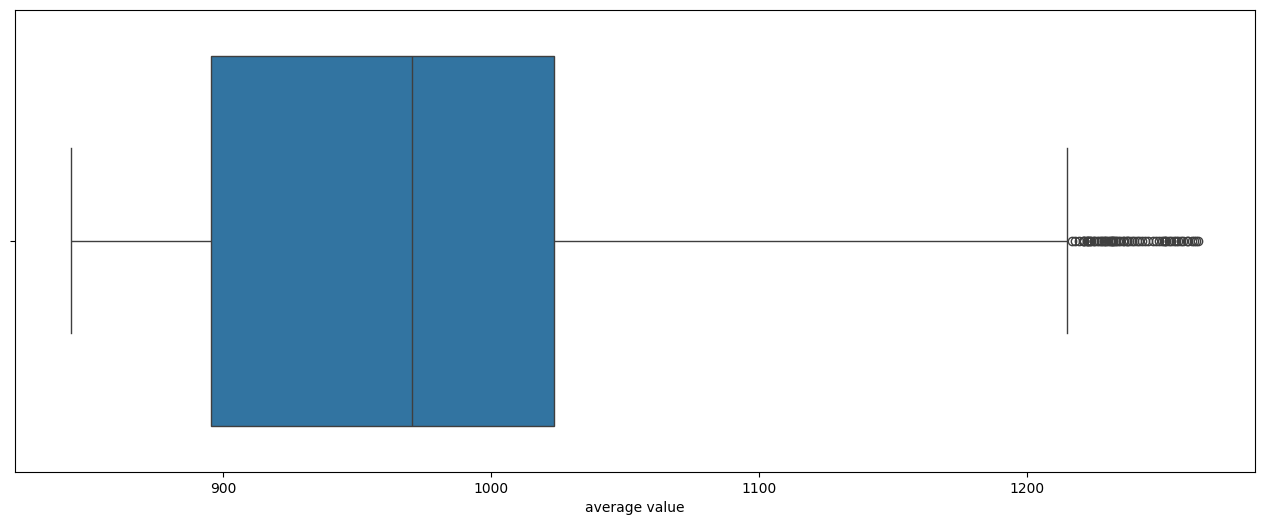

In [17]:
fig, ax=plt.subplots(figsize=(16,6))
sns.boxplot(USD_exchange_rate, orient='h')
;

<Axes: ylabel='Frequency'>

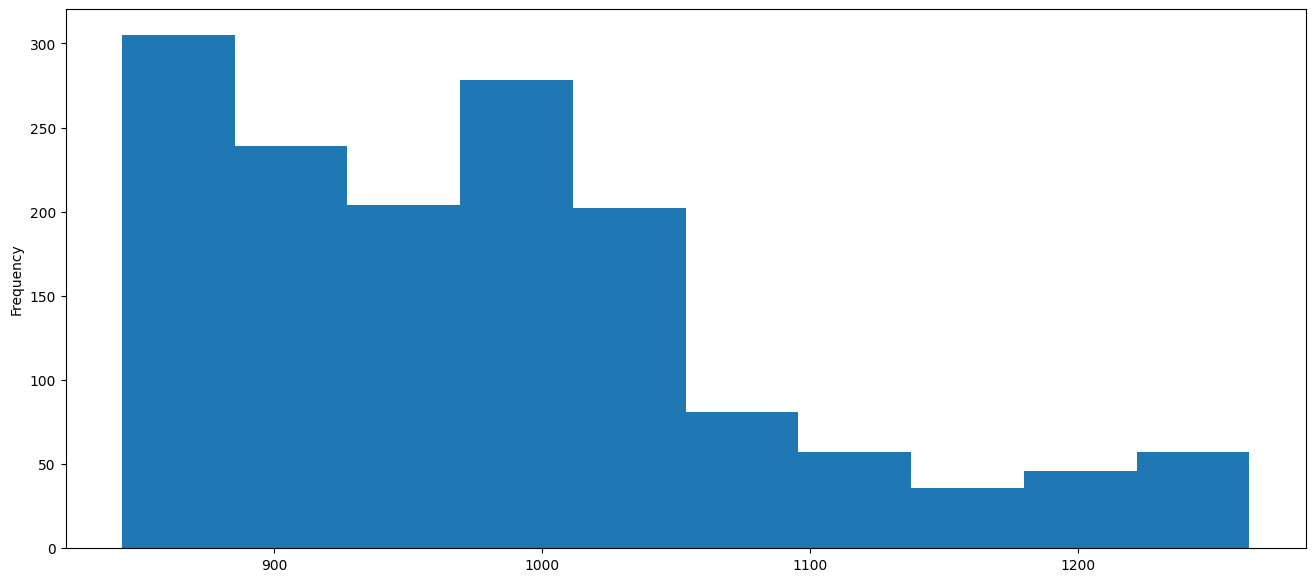

In [24]:
fig, ax=plt.subplots(figsize=(16,7))
USD_exchange_rate.plot(kind='hist')

# resampling our data to weekly

In [18]:
USD_exchange_rate = USD_exchange_rate.resample('W').mean()

In [23]:
USD_exchange_rate.head()

date
2017-12-01    843.273321
2017-12-04    843.383553
2017-12-05    843.463553
2017-12-06    843.563554
2017-12-07    843.653767
Name: average value, dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'transformed_data' is your time series data after log and differencing transformations
adf_result = adfuller(USD_exchange_rate_clean.dropna())

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the p-value is less than 0.05, the series is stationary
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: 3.626001
p-value: 1.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The time series is not stationary.


In [21]:
# Assuming 'data' is your DataFrame with timestamps as the index
# Resample data to weekly frequency (starting on Mondays) and calculate the mean
# USD_exchange_rate = USD_exchange_rate.resample('W-MON').mean()
# USD_exchange_rate = USD_exchange_rate.resample('M').mean()


<Axes: title={'center': 'USD-to-RWF exchange rate'}, xlabel='Date', ylabel='Rates'>

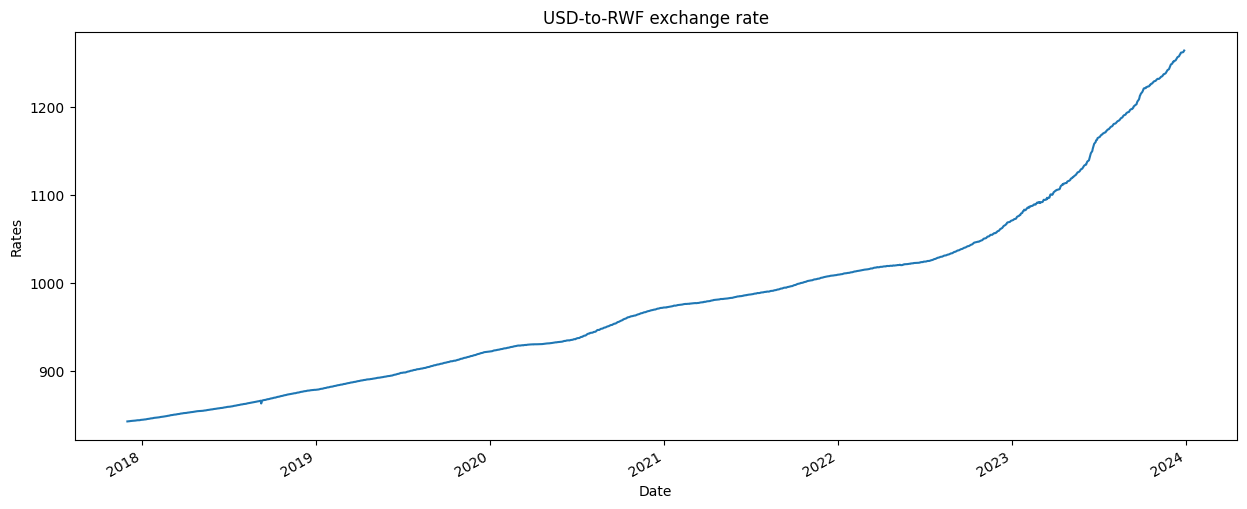

In [22]:
# weekly_data
fig, ax = plt.subplots(figsize=(15, 6))
USD_exchange_rate.plot(xlabel='Date', ylabel='Rates', title='USD-to-RWF exchange rate',ax=ax)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

''

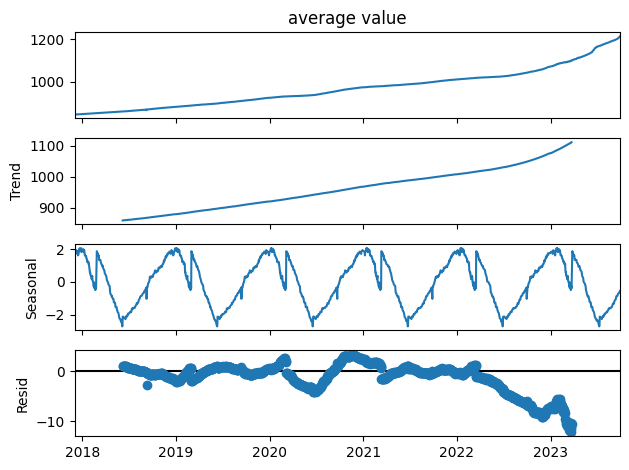

In [27]:
result = seasonal_decompose(USD_exchange_rate_clean, period=252)
result.plot()
;

In [28]:
print(USD_exchange_rate.index.freq)  # This should print the frequency if it's set

None


In [29]:
def ts_plot(data):
    #Creating rolling mean and std
    rolling_mean1 = data.rolling(2).mean()
    rolling_std1 = data.rolling(2).std()


    fig, ax = plt.subplots(figsize=(17,6))
    # original = 
    plt.plot(data, color='blue', label='original')
    # roll_mean = 
    plt.plot(rolling_mean1, color='red', label='roll_mean')
    # roll_std = 
    plt.plot(rolling_std1, color='black', label='roll_std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling Std ')

    return fig

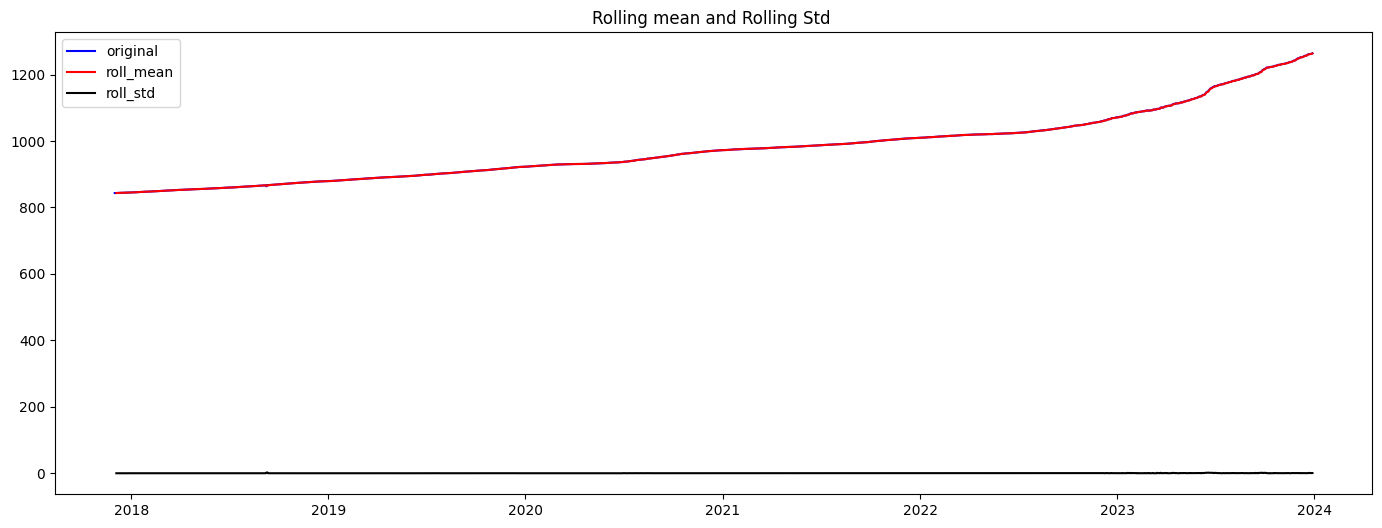

In [31]:
plot1 = ts_plot(USD_exchange_rate)

Making Transformations on our Data

In [31]:
ts_log = np.log(USD_exchange_rate)
ts_log.tail()

date
2023-12-21    7.138899
2023-12-22    7.140025
2023-12-27    7.140532
2023-12-28    7.141206
2023-12-29    7.141981
Name: average value, dtype: float64

In [32]:
# Assuming 'transformed_data' is your time series data after log and differencing transformations
adf_result = adfuller(ts_log.dropna())

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the p-value is less than 0.05, the series is stationary
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: 3.841824
p-value: 1.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
The time series is not stationary.


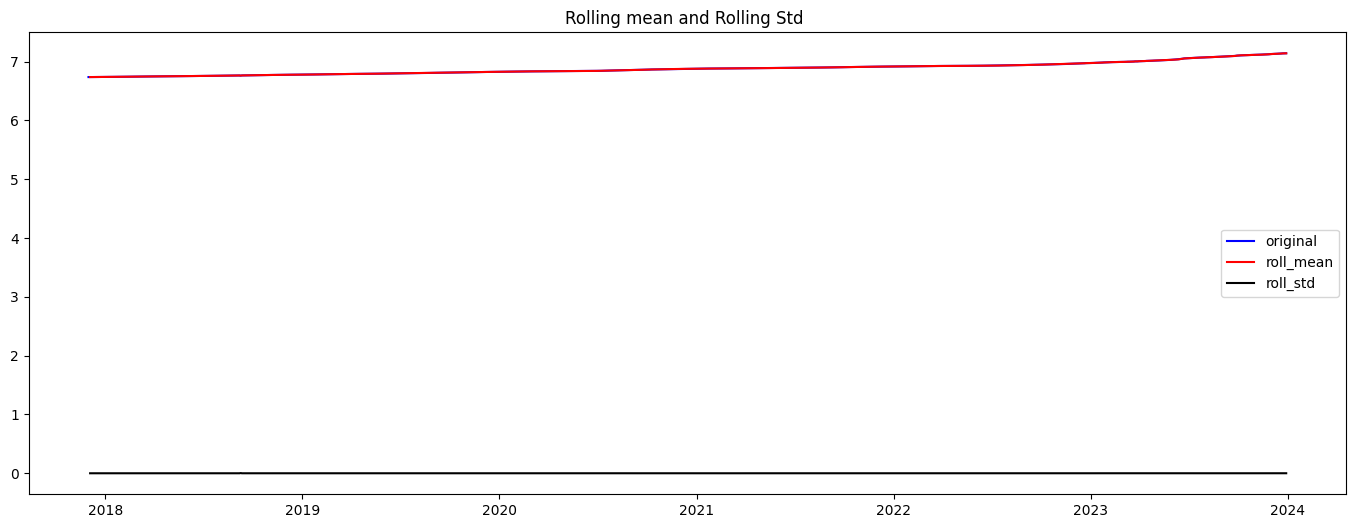

In [33]:
log_plot = ts_plot(ts_log)

let's try differencing to see if it makes any change

In [34]:
ts_log_dif = ts_log - ts_log.shift()
ts_log_dif.head()

date
2017-12-01         NaN
2017-12-04    0.000131
2017-12-05    0.000095
2017-12-06    0.000119
2017-12-07    0.000107
Name: average value, dtype: float64

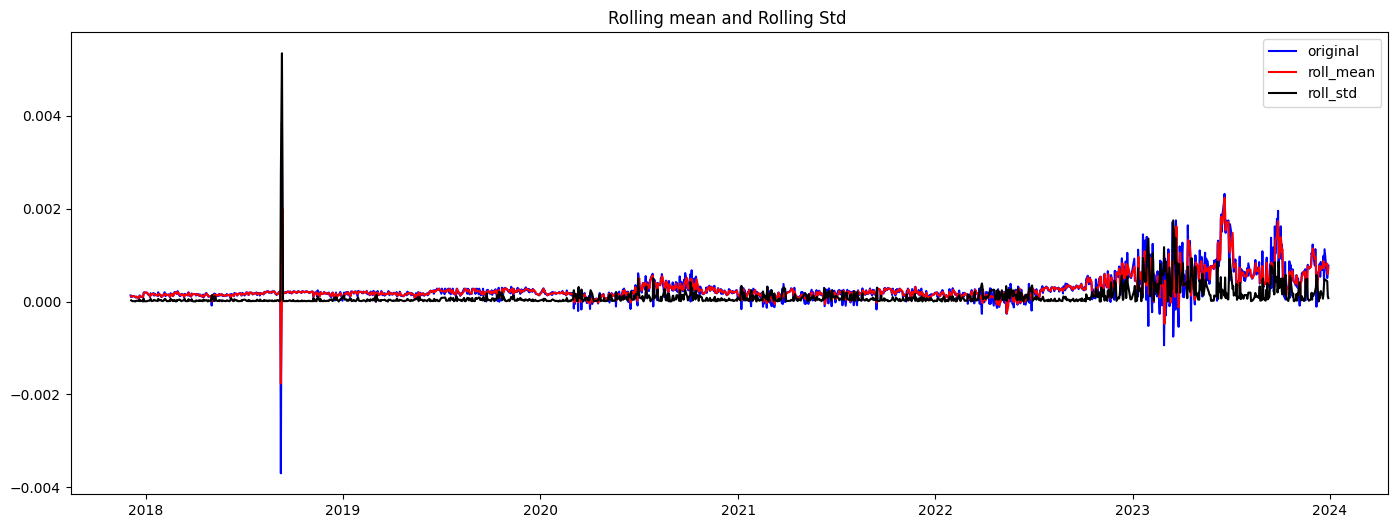

In [35]:
log_dif_plot = ts_plot(ts_log_dif)

In [36]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'transformed_data' is your time series data after log and differencing transformations
adf_result = adfuller(ts_log_dif.dropna())

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the p-value is less than 0.05, the series is stationary
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -3.082563
p-value: 0.027871
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
The time series is stationary.


In [37]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

lag_acf = acf(ts_log_dif, nlags=20)
lag_pacf = pacf(ts_log_dif, nlags=20)

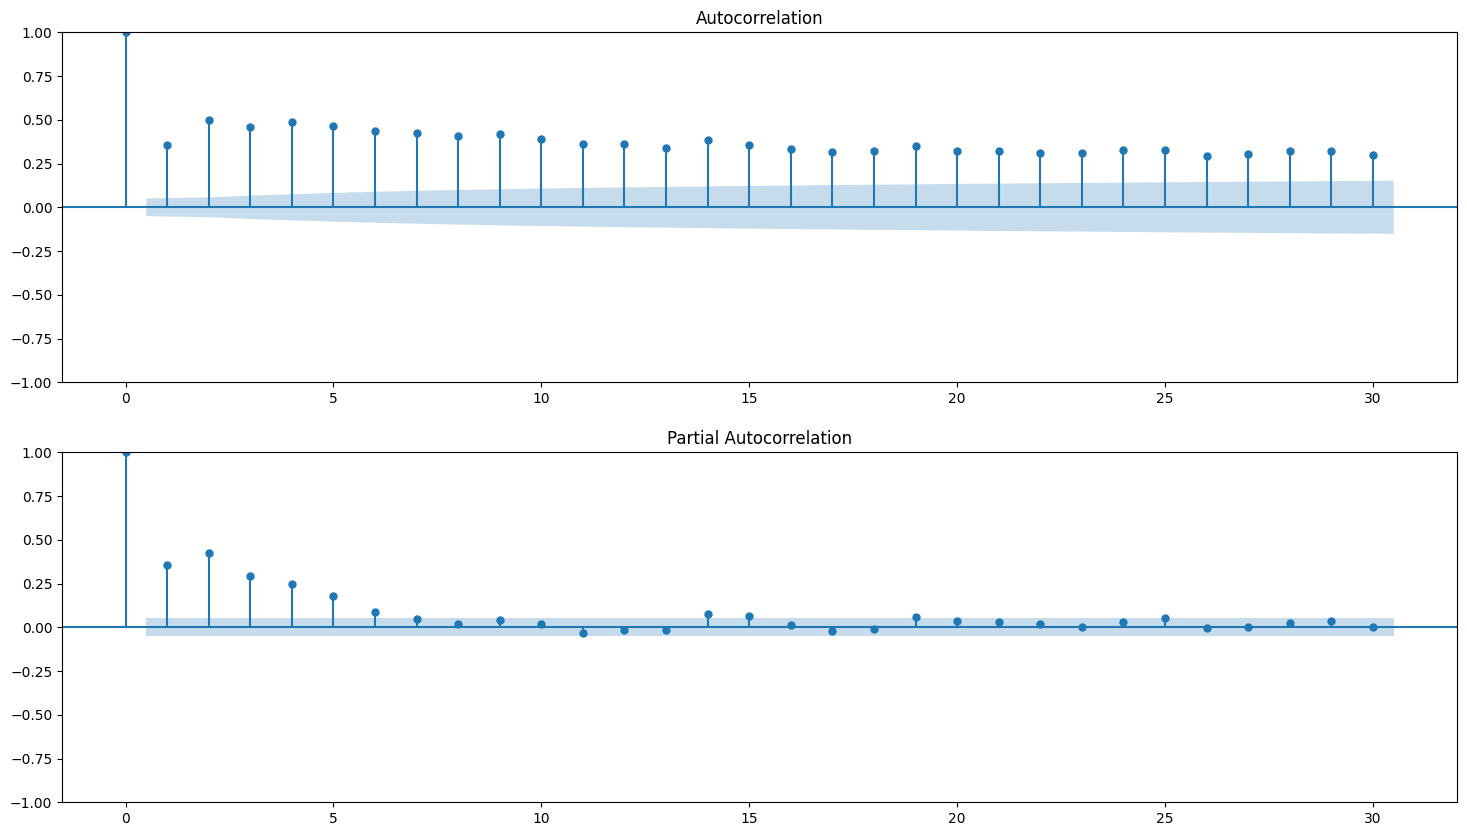

In [38]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_dif.dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_dif.dropna(), lags=30, ax=ax2)

# Data splitting

Splitting the original dataset for evaluation and plotting

In [40]:
first_split_org = int(len(USD_exchange_rate)*0.8)

y_train_org1 = USD_exchange_rate[ :first_split_org]
y_test_org = USD_exchange_rate[first_split_org: ]
len(y_train_org1) + len(y_test_org) == len(USD_exchange_rate)

print(y_train_org1.head())
print(y_train_org1.shape)
print(y_test_org.head())
print(y_test_org.shape)

date
2017-12-01    843.273321
2017-12-04    843.383553
2017-12-05    843.463553
2017-12-06    843.563554
2017-12-07    843.653767
Name: average value, dtype: float64
(1204,)
date
2022-10-13    1045.51
2022-10-14    1046.05
2022-10-17    1046.40
2022-10-18    1046.45
2022-10-19    1046.73
Name: average value, dtype: float64
(301,)


In [34]:
second_split_org = int(len(y_train_org1)*0.9)

y_train_org2 = y_train_org1[:second_split_org]
y_val_org = y_train_org1[second_split_org:]

print(y_train_org2.head())
print(y_train_org2.shape)
print(y_val_org.head())
print(y_val_org.shape)
print(y_test_org.head())
print(y_test_org.shape)

date
2017-12-31    844.087417
2018-01-31    846.408207
2018-02-28    848.815276
2018-03-31    851.420056
2018-04-30    853.914111
Freq: ME, Name: average value, dtype: float64
(45,)
date
2021-09-30     995.439171
2021-10-31    1000.199487
2021-11-30    1004.412609
2021-12-31    1008.208182
2022-01-31    1011.162500
Freq: ME, Name: average value, dtype: float64
(6,)
date
2022-03-31    1017.113913
2022-04-30    1019.470556
2022-05-31    1021.128500
2022-06-30    1023.172727
2022-07-31    1026.526667
Freq: ME, Name: average value, dtype: float64
(22,)


splitting the logged_diff data for modeling and predicting

In [35]:
first_split_log_diff = int(len(ts_log_dif)*0.7)

y_train_final1 = ts_log_dif[ :first_split_log_diff]
y_test_final  = ts_log_dif[first_split_log_diff: ]
len(y_train_final1) + len(y_test_final) == len(ts_log_dif)

print(y_train_final1.head())
print(y_train_final1.shape)
print(y_test_final.head())
print(y_test_final.shape)

date
2017-12-31         NaN
2018-01-31    0.002746
2018-02-28    0.002840
2018-03-31    0.003064
2018-04-30    0.002925
Freq: ME, Name: average value, dtype: float64
(51,)
date
2022-03-31    0.002882
2022-04-30    0.002314
2022-05-31    0.001625
2022-06-30    0.002000
2022-07-31    0.003273
Freq: ME, Name: average value, dtype: float64
(22,)


In [36]:
second_split_log_diff = int(len(y_train_final1)*0.9)

y_train_final2 = y_train_final1[:second_split_log_diff]
y_val_final = y_train_final1[second_split_log_diff:]

print(y_train_final2.tail())
print(y_train_final2.shape)
print(y_val_final.head())
print(y_val_final.shape)
print(y_test_final.tail())
print(y_test_final.shape)


date
2021-04-30    0.003051
2021-05-31    0.002117
2021-06-30    0.002824
2021-07-31    0.002958
2021-08-31    0.002812
Freq: ME, Name: average value, dtype: float64
(45,)
date
2021-09-30    0.003918
2021-10-31    0.004771
2021-11-30    0.004203
2021-12-31    0.003772
2022-01-31    0.002926
Freq: ME, Name: average value, dtype: float64
(6,)
date
2023-08-31    0.011925
2023-09-30    0.013418
2023-10-31    0.017940
2023-11-30    0.010600
2023-12-31    0.014981
Freq: ME, Name: average value, dtype: float64
(22,)


splitting logged data for reversing the transformations

In [37]:
first_split_log = int(len(ts_log)*0.9)

y_train_log1 = ts_log[ :first_split_log]
y_test_log = ts_log[first_split_log: ]
len(y_train_log1) + len(y_test_log) == len(ts_log)

print(y_train_log1.head())
print(y_train_log1.shape)
print(y_test_log.head())
print(y_test_log.shape)

date
2017-12-31    6.738256
2018-01-31    6.741002
2018-02-28    6.743842
2018-03-31    6.746906
2018-04-30    6.749831
Freq: ME, Name: average value, dtype: float64
(65,)
date
2023-05-31    7.024428
2023-06-30    7.044768
2023-07-31    7.066679
2023-08-31    7.078604
2023-09-30    7.092021
Freq: ME, Name: average value, dtype: float64
(8,)


In [38]:
second_split_log = int(len(y_train_log1)*0.9)

y_train_log2 = y_train_log1[:second_split_log]
y_val_log = y_train_log1[second_split_log:]

print(y_train_log2.head())
print(y_train_log2.shape)
print(y_val_log.head())
print(y_val_log.shape)
print(y_test_log.head())
print(y_test_log.shape)

date
2017-12-31    6.738256
2018-01-31    6.741002
2018-02-28    6.743842
2018-03-31    6.746906
2018-04-30    6.749831
Freq: ME, Name: average value, dtype: float64
(58,)
date
2022-10-31    6.952479
2022-11-30    6.960070
2022-12-31    6.970260
2023-01-31    6.982390
2023-02-28    6.992611
Freq: ME, Name: average value, dtype: float64
(7,)
date
2023-05-31    7.024428
2023-06-30    7.044768
2023-07-31    7.066679
2023-08-31    7.078604
2023-09-30    7.092021
Freq: ME, Name: average value, dtype: float64
(8,)


In [39]:
# fig, ax=plt.subplots(figsize=(16,8))
# plt.plot(y_train_final)
# plt.plot(y_val)
# plt.plot(y_test)

# Creating model

let's make a grid search for the best hyper parameters

In [40]:
p_params = range(0,3,1)
q_params = range(0,3,1)
print(list(p_params))
print(list(q_params))

[0, 1, 2]
[0, 1, 2]


In [41]:
from statsmodels.tsa.arima.model import ARIMA
import time

In [52]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import time

warnings.filterwarnings("ignore")

# Assuming `p_params`, `d_params`, and `q_params` are lists of parameters you want to try
mae_grid = dict()

# Use a try-except block to handle potential errors
try:
    # Iterate through all combinations of p, d, and q
    for p in p_params:
        mae_grid[p] = list()
        # for d in d_params:
        for q in q_params:
            order = (p, 0, q)
            start_time = time.time()
            
            # Fit the ARIMA model
            model = ARIMA(y_train_final2.dropna(), order=order).fit()
            
            elapsed_time = round(time.time() - start_time, 2)
            print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
            
            # Generate predictions on the validation set
            y_pred = model.predict()

            # Step 1: Reverse Log Transformation
            predicted_log = y_pred.cumsum()

            # Step 2: Reverse Differencing
            first_value = y_train_log2.iloc[0]  # Assuming ts_log is the original log-transformed series
            predicted_log += first_value

            # Step 3: Reverse Log Transformation
            predicted_original_scale = np.exp(predicted_log)
            
            # Calculate MAE on the validation set
            mae = mean_absolute_error(y_train_org2[1:], predicted_original_scale)
            
            # Store the results
            mae_grid[p].append(mae)

except Exception as e:
    print(f"An error occurred: {e}")

# Print the results
print(mae_grid)


Trained ARIMA (0, 0, 0) in 0.22 seconds.
Trained ARIMA (0, 0, 1) in 0.27 seconds.
Trained ARIMA (0, 0, 2) in 0.49 seconds.
Trained ARIMA (1, 0, 0) in 0.42 seconds.
Trained ARIMA (1, 0, 1) in 0.62 seconds.
Trained ARIMA (1, 0, 2) in 0.82 seconds.
Trained ARIMA (2, 0, 0) in 0.72 seconds.
Trained ARIMA (2, 0, 1) in 0.42 seconds.
Trained ARIMA (2, 0, 2) in 0.93 seconds.
{0: [3.523330478184826, 5.303596999980546, 5.275738501829767], 1: [4.99298769151466, 4.832933975579772, 3.89627953146327], 2: [4.684670850972519, 3.415726732599221, 3.3745027586631973]}


In [53]:
# Sort the mae_grid dictionary by values (MAE)
sorted_mae = sorted(mae_grid.items(), key=lambda x: x[1])

# Get the top 3 models with the lowest MAE
top_3_models = sorted_mae[:3]

# Print the top 3 models
print("Top 3 Models:")
for order, mae in top_3_models:
    print(f"Order: {order}, MAE: {mae}")


Top 3 Models:
Order: 0, MAE: [3.523330478184826, 5.303596999980546, 5.275738501829767]
Order: 2, MAE: [4.684670850972519, 3.415726732599221, 3.3745027586631973]
Order: 1, MAE: [4.99298769151466, 4.832933975579772, 3.89627953146327]


In [54]:
import pandas as pd

# Create a DataFrame from the mae_grid dictionary
mae_df = pd.DataFrame.from_dict(mae_grid)

# Print the DataFrame
print("MAE Grid DataFrame:")
mae_df.round(4)


MAE Grid DataFrame:


,0,1,2
0,3.5233,4.9930,4.6847
1,5.3036,4.8329,3.4157
2,5.2757,3.8963,3.3745


Text(0.5, 1.0, 'ARMA Grid Search (Criterion: MAE)')

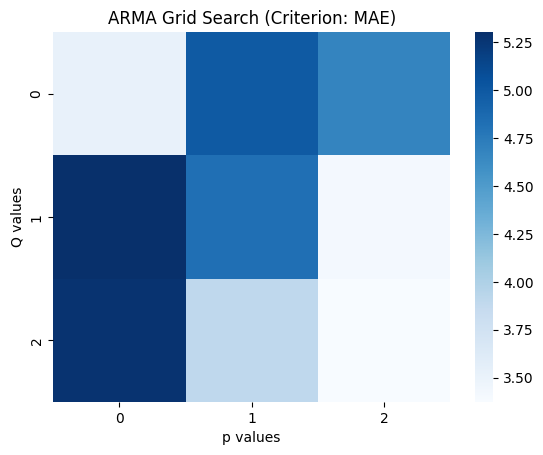

In [55]:
sns.heatmap(mae_df, cmap = 'Blues')
plt.xlabel('p values')
plt.ylabel('Q values')
plt.title('ARMA Grid Search (Criterion: MAE)')


In [45]:
import pmdarima as pm

model = pm.auto_arima(ts_log_dif,
                      start_p=0, d=0, start_q=0,
                      max_p=2, max_q=4, 
                      stationary=True,
                      trend='ct', method='lbfgs',
                      error_action='trace', suppress_warnings=True,
                      scoring='mae',
                      trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20160.313, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-20234.613, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-20076.319, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-20160.313, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-20447.246, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-20534.729, Time=1.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-20239.519, Time=1.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-20475.532, Time=1.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-20497.015, Time=1.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-20534.729, Time=1.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 8.198 seconds


In [45]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

step_wise_fit2 = auto_arima(
    ts_log_dif, 
    start_P=0, max_p=3, 
    start_q=0, 
    max_q=4, 
    d=0,
    seasonal=True,
    stationary=False, 
    random_state=42,
    suppress_warnings=True, 
    trace=True
    )

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-670.508, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-575.440, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-670.884, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-629.862, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-507.926, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-671.552, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-667.609, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-672.293, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-642.031, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-648.979, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-672.647, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-658.331, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-654.969, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-670.261, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept

In [43]:
step_wise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   73
Model:               SARIMAX(1, 0, 3)   Log Likelihood                 342.324
Date:                Wed, 22 May 2024   AIC                           -672.647
Time:                        12:53:20   BIC                           -658.904
Sample:                    12-31-2017   HQIC                          -667.170
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.001      0.769      0.442      -0.001       0.002
ar.L1          0.9324      0.058     16.067      0.000       0.819       1.046
ma.L1          0.0051      0.120      0.043      0.966      -0.230       0.241
ma.L2         -0.3005      0.090     -3.323      0.001      -0.478      -0.123
ma.L3          0.1102      0.145      0.760      0.447      -0.174       0.394
sigma2      4.225e-06   4.13e-07     10.240      0.000    3.42e-06    5.03e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               236.40
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):              33.69   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

set the baseline

In [3]:
import pandas as pd
data = pd.read_excel('./cleaned_set.xlxs')

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [58]:
y_train_mean = USD_exchange_rate.mean()
mae_baseline = mean_absolute_error(y_train_org2[1:], [y_train_mean] * len(y_train_org2[1:]))
print("Mean exchange rate:", y_train_mean)
print("Baseline MAE:", (mae_baseline))

Mean exchange rate: 978.820081860465
Baseline MAE: 59.5855494894804


In [60]:
from statsmodels.tsa.arima.model import ARIMA


model_train = ARIMA(ts_log_dif, order=(1,0,2)).fit()
y_train_pred = model_train.predict(start=y_train_final2.index[1], end=y_train_final2.index[-1])

In [61]:
# Retrieve the model parameters
ar_params = model_train.arparams
ma_params = model_train.maparams
differencing_order = model_train.model.order[1]  # Get the differencing order


In [62]:
print(ar_params)
print(ma_params)
print(differencing_order)

[0.97959464]
[-1.01058008  0.1971909 ]
0


In [63]:
# Retrieve the summary table
summary_table = model_train.summary()
summary_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          average value   No. Observations:                 1505
Model:                 ARIMA(1, 0, 2)   Log Likelihood               10340.688
Date:                Wed, 22 May 2024   AIC                         -20671.376
Time:                        09:21:07   BIC                         -20644.793
Sample:                             0   HQIC                        -20661.474
                               - 1505                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   7.92e-05      3.397      0.001       0.000       0.000
ar.L1          0.9796      0.004    218.949      0.000       0.971       0.988
ma.L1         -1.0106      0.009   -118.293      0.000      -1.027      -0.994
ma.L2          0.1972      0.009     21.600      0.000       0.179       0.215
sigma2      6.181e-08   4.74e-10    130.370      0.000    6.09e-08    6.27e-08
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):            318472.56
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# Retrieve the standard errors of the model parameters
standard_errors = model_train.bse
standard_errors

const     7.922318e-05
ar.L1     4.474067e-03
ma.L1     8.543012e-03
ma.L2     9.129294e-03
sigma2    4.741182e-10
dtype: float64

In [65]:
print(y_train_pred)
print(y_train_final2[1:])

date
2017-12-04    0.000269
2017-12-05    0.000217
2017-12-06    0.000174
2017-12-07    0.000154
2017-12-08    0.000145
                ...   
2022-10-26    0.000211
2022-10-27    0.000258
2022-10-28    0.000237
2022-10-31    0.000255
2022-11-01    0.000243
Name: predicted_mean, Length: 1217, dtype: float64
date
2017-12-04    0.000131
2017-12-05    0.000095
2017-12-06    0.000119
2017-12-07    0.000107
2017-12-08    0.000119
                ...   
2022-10-26    0.000115
2022-10-27    0.000344
2022-10-28    0.000210
2022-10-31    0.000496
2022-11-01    0.000496
Name: average value, Length: 1217, dtype: float64


reversing back the transformatioons made on the training set predictions 

In [66]:
import numpy as np

# Step 1: Reverse Log Transformation
predicted_log = y_train_pred.cumsum()

# Step 2: Reverse Differencing
first_value = y_train_log2.iloc[0]  # Assuming ts_log is the original log-transformed series
predicted_log += first_value

# Step 3: Reverse Log Transformation
pred_train_original_scale = np.exp(predicted_log)

# Now 'predicted_original_scale' contains the predicted values in the original scale of the data
pred_train_original_scale

date
2017-12-04     843.500267
2017-12-05     843.683141
2017-12-06     843.830050
2017-12-07     843.959635
2017-12-08     844.081978
                 ...     
2022-10-26    1060.047593
2022-10-27    1060.321181
2022-10-28    1060.572199
2022-10-31    1060.842741
2022-11-01    1061.100123
Name: predicted_mean, Length: 1217, dtype: float64

ploting the in-samples predictions along the original series

''

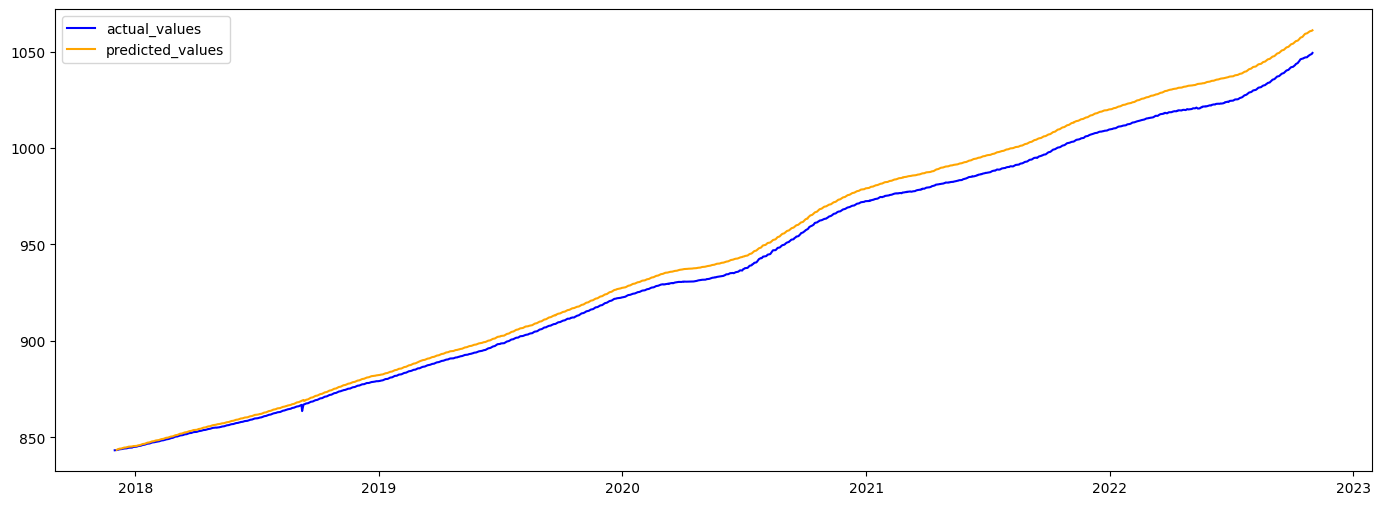

In [67]:
fig, plt.subplots(figsize=(17,6))
plt.plot(y_train_org2, color='blue', label='actual_values')
plt.plot(pred_train_original_scale, color='orange', label='predicted_values')
plt.legend(loc='best')
;

In [68]:
mae_train = mean_absolute_error(y_train_org2[1:], pred_train_original_scale)
mae_train

6.188134572194048

In [69]:
residuals = model_train.resid.dropna()
residuals

date
2017-12-04   -0.000138
2017-12-05   -0.000122
2017-12-06   -0.000056
2017-12-07   -0.000047
2017-12-08   -0.000026
                ...   
2023-12-21   -0.000208
2023-12-22    0.000408
2023-12-27   -0.000148
2023-12-28   -0.000059
2023-12-29    0.000080
Length: 1504, dtype: float64

<Axes: >

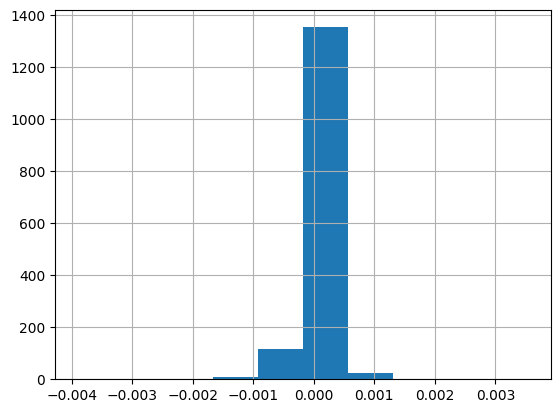

In [70]:
residuals.hist()

the Autocorrelation plot for the residuals

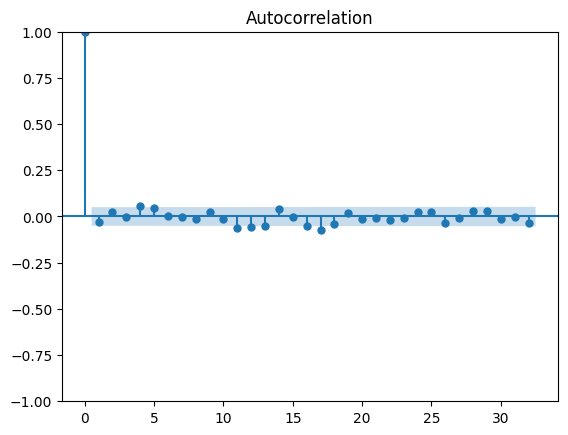

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


redid_plot = plot_acf(residuals)

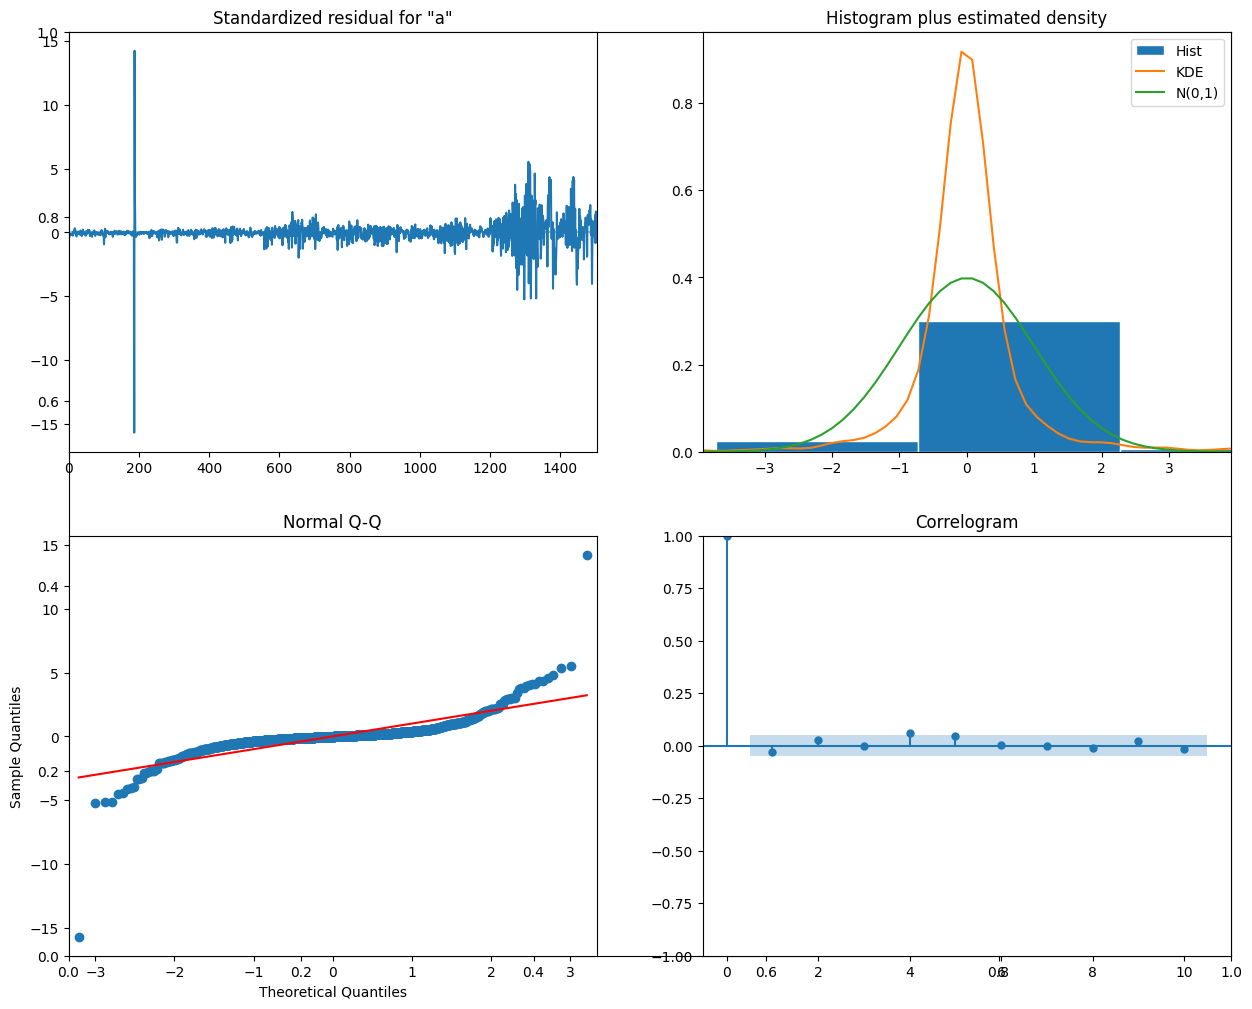

In [72]:
fig, ax = plt.subplots(figsize=(15, 12))
model_train.plot_diagnostics(fig=fig);

# Prediction on the validation set

walk forward validation for the validation set

In [73]:
pred_val_wfv= pd.Series()
history = y_train_final2.copy()

for i in y_val_final.index:
    model_val = ARIMA(history, order=(1,0,2)).fit()
    next_pred = model_val.forecast()
    
    # Create a new Series with the forecasted value and timestamp index
    next_pred_with_timestamp = pd.Series(data=next_pred.iloc[0], index=[i])
    
    # Concatenate the new Series with history
    history = pd.concat([history, next_pred_with_timestamp])
    
    # Update predictions_original_scale
    pred_val_wfv = pd.concat([pred_val_wfv, next_pred_with_timestamp])
    



Reversing back the transformations after predicting on the validation set

In [74]:
pred_val_wfv.head(10)

2022-11-02    0.000094
2022-11-03    0.000233
2022-11-04    0.000222
2022-11-07    0.000214
2022-11-08    0.000207
2022-11-09    0.000201
2022-11-10    0.000197
2022-11-11    0.000194
2022-11-14    0.000191
2022-11-15    0.000189
dtype: float64

In [75]:
import numpy as np

# Assuming 'y_val_pred' contains the out-of-sample predictions in log scale

# Step 1: Reverse Log Transformation
predicted_log_val = pred_val_wfv.cumsum()

# Step 2: Reverse Differencing
first_value = y_val_log.iloc[0]  # Last observed value in the training set
predicted_log_val += first_value

# Step 3: Reverse Log Transformation
pred_val_original_scale = np.exp(predicted_log_val)

# Now 'predicted_original_scale' contains the predicted values in the original scale of the data for the validation set
print(pred_val_original_scale)
print(y_val_org)

2022-11-02    1050.008549
2022-11-03    1050.252770
2022-11-04    1050.485490
2022-11-07    1050.710083
2022-11-08    1050.927404
                 ...     
2023-05-17    1075.262259
2023-05-18    1075.455299
2023-05-19    1075.648373
2023-05-22    1075.841481
2023-05-23    1076.034624
Length: 136, dtype: float64
date
2022-11-02    1049.91
2022-11-03    1050.47
2022-11-04    1050.59
2022-11-07    1050.95
2022-11-08    1051.17
               ...   
2023-05-17    1124.16
2023-05-18    1124.67
2023-05-19    1125.66
2023-05-22    1126.33
2023-05-23    1126.76
Name: average value, Length: 136, dtype: float64


In [76]:
residuals_valid = model_val.resid.dropna()
residuals_valid

2017-12-04   -4.879971e-05
2017-12-05   -9.866350e-05
2017-12-06   -8.795496e-05
2017-12-07   -9.028511e-05
2017-12-08   -7.515144e-05
                  ...     
2023-05-16    4.447114e-09
2023-05-17    3.545072e-09
2023-05-18    2.649440e-09
2023-05-19    1.760108e-09
2023-05-22    8.769865e-10
Length: 1352, dtype: float64

<Axes: >

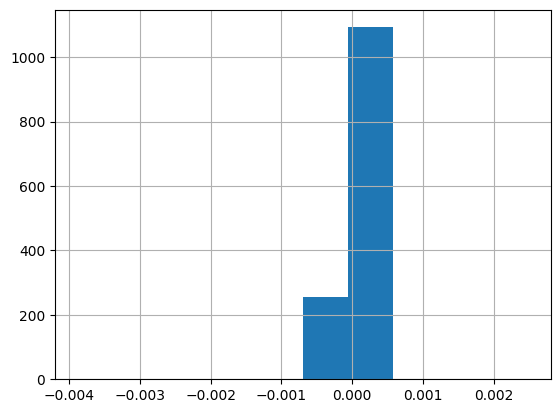

In [77]:
residuals_valid.hist()

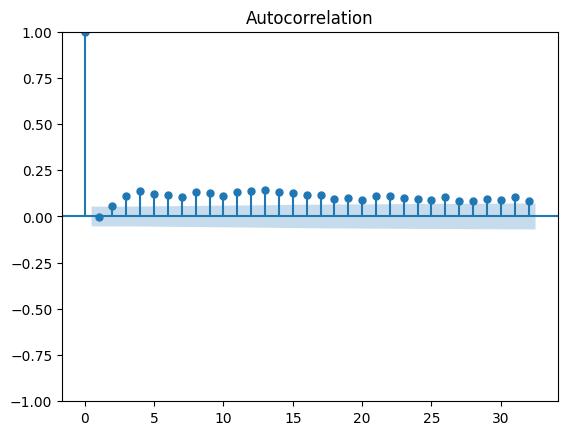

In [78]:
resid_plot_valid = plot_acf(residuals_valid)

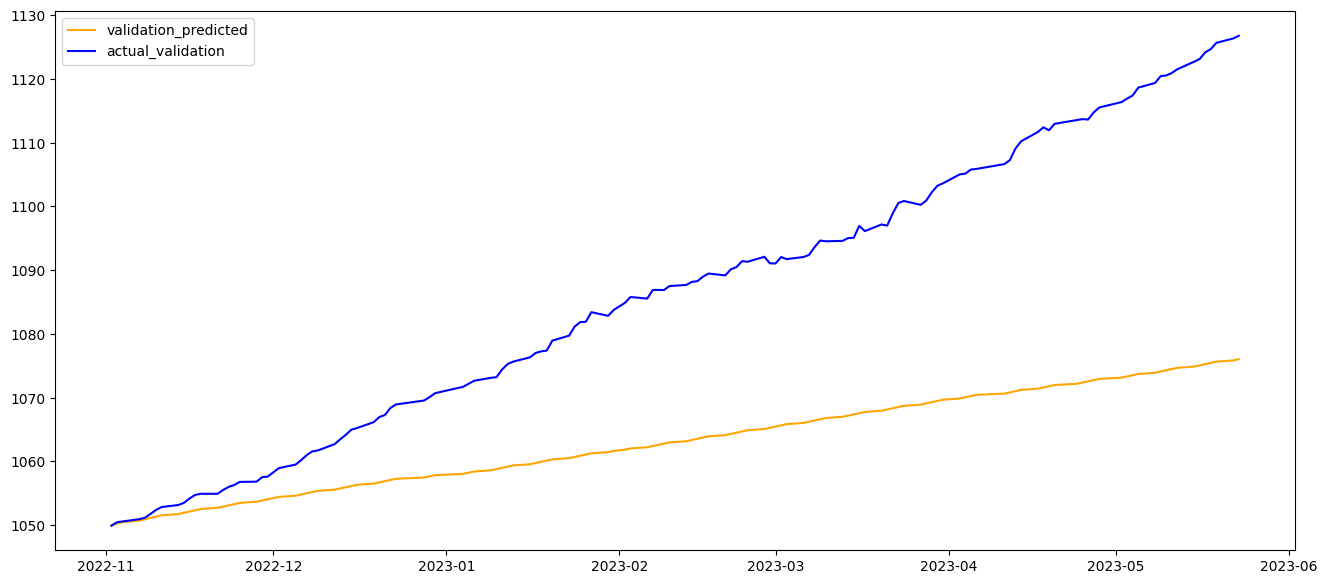

In [80]:
fig, plt.subplots(figsize=(16,7))
plt.plot(pred_val_original_scale, color='orange', label='validation_predicted')
plt.plot(y_val_org, color='blue', label='actual_validation')
plt.legend(loc='best')
# plt.plot(pred_train_original_scale, color='orange')
# plt.plot(y_train_org2, color='blue')

mean absolute error for the predictions on validation set

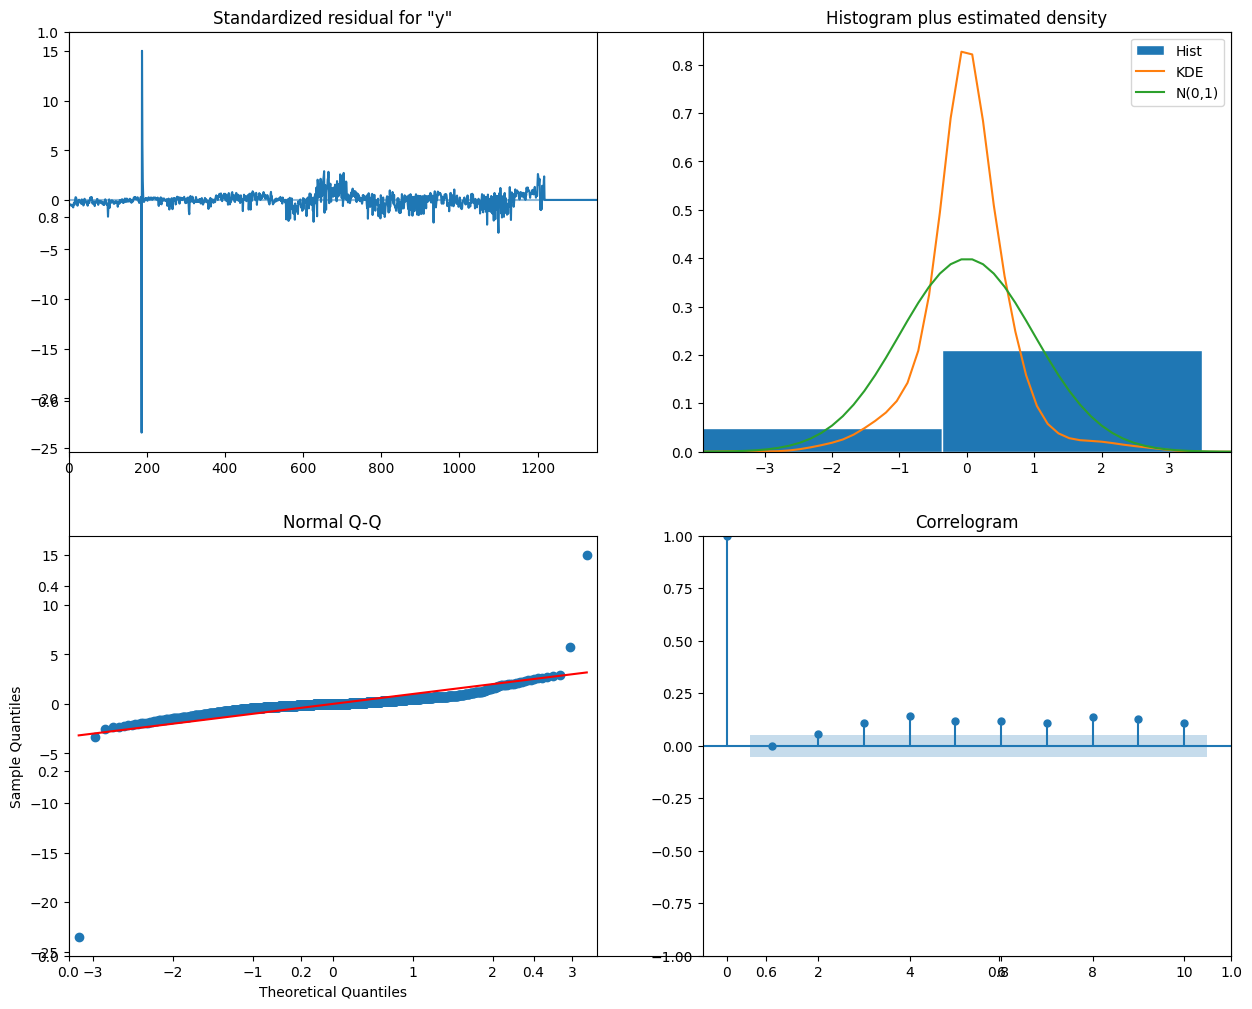

In [81]:
fig, ax = plt.subplots(figsize=(15, 12))
model_val.plot_diagnostics(fig=fig);

In [82]:
mae_valid = mean_absolute_error(y_val_org, pred_val_original_scale)
mae_valid

22.92917565016795

In [45]:
# fig, plt.subplots(figsize = (18,6))
# plt.plot(y_train_final, color = 'blue')
# plt.plot(y_pred, color = 'black')
# plt.plot(val_pred, color = 'red')

# Test data prediction

In [ ]:
pred_test_wfv= pd.Series()
history = y_train_final1.copy()

for i in y_test_final.index:
    model_test = ARIMA(history, order=(2,0,4)).fit()
    next_pred = model_test.forecast()
    
    # Create a new Series with the forecasted value and timestamp index
    next_pred_with_timestamp = pd.Series(data=next_pred.iloc[0], index=[i])
    
    # Concatenate the new Series with history
    history = pd.concat([history, next_pred_with_timestamp])
    
    # Update predictions_original_scale
    pred_test_wfv = pd.concat([pred_test_wfv, next_pred_with_timestamp])

In [94]:
import numpy as np

# Step 1: Reverse Log Transformation
predicted_log_test = pred_test_wfv.cumsum()

# Step 2: Reverse Differencing
first_value = y_test_log.iloc[0]  # Last observed value in the training set
predicted_log_test += first_value

# Step 3: Reverse Log Transformation
pred_test_original_scale = np.exp(predicted_log_test)

# Now 'predicted_original_scale' contains the predicted values in the original scale of the data for the validation set
print(pred_test_original_scale)
print(y_test_org)

2022-03-02    1127.603400
2022-03-03    1127.796538
2022-03-04    1127.991448
2022-03-07    1128.187649
2022-03-08    1128.384811
                 ...     
2023-12-21    1220.278031
2023-12-22    1220.493761
2023-12-27    1220.709529
2023-12-28    1220.925335
2023-12-29    1221.141179
Length: 452, dtype: float64
date
2023-05-24    1127.40
2023-05-25    1128.26
2023-05-26    1129.10
2023-05-29    1129.97
2023-05-30    1130.79
               ...   
2023-12-21    1260.04
2023-12-22    1261.46
2023-12-27    1262.10
2023-12-28    1262.95
2023-12-29    1263.93
Name: average value, Length: 151, dtype: float64


In [95]:
residuals_test = model_test.resid.dropna()
residuals_test

2017-12-04   -4.606108e-05
2017-12-05   -9.694801e-05
2017-12-06   -9.010320e-05
2017-12-07   -9.397908e-05
2017-12-08   -8.007227e-05
                  ...     
2023-12-20    2.168404e-19
2023-12-21    3.252607e-19
2023-12-22   -5.421011e-20
2023-12-27    2.168404e-19
2023-12-28    8.131516e-20
Length: 1503, dtype: float64

<Axes: >

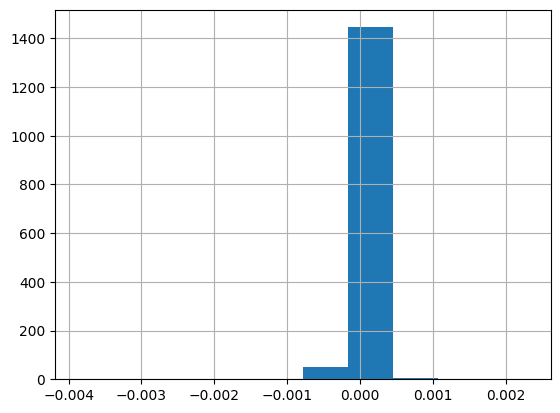

In [96]:
residuals_test.hist()

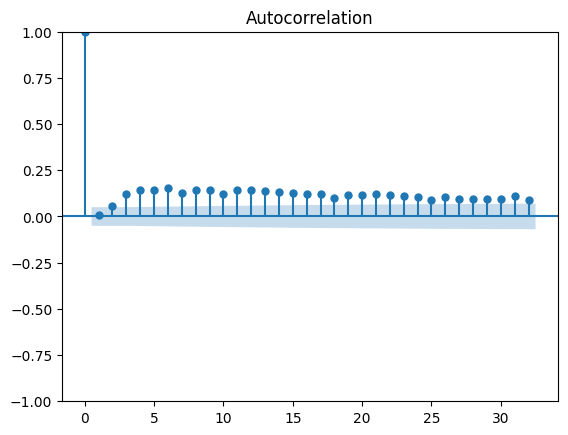

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
resid_plot_test = plot_acf(residuals_test)

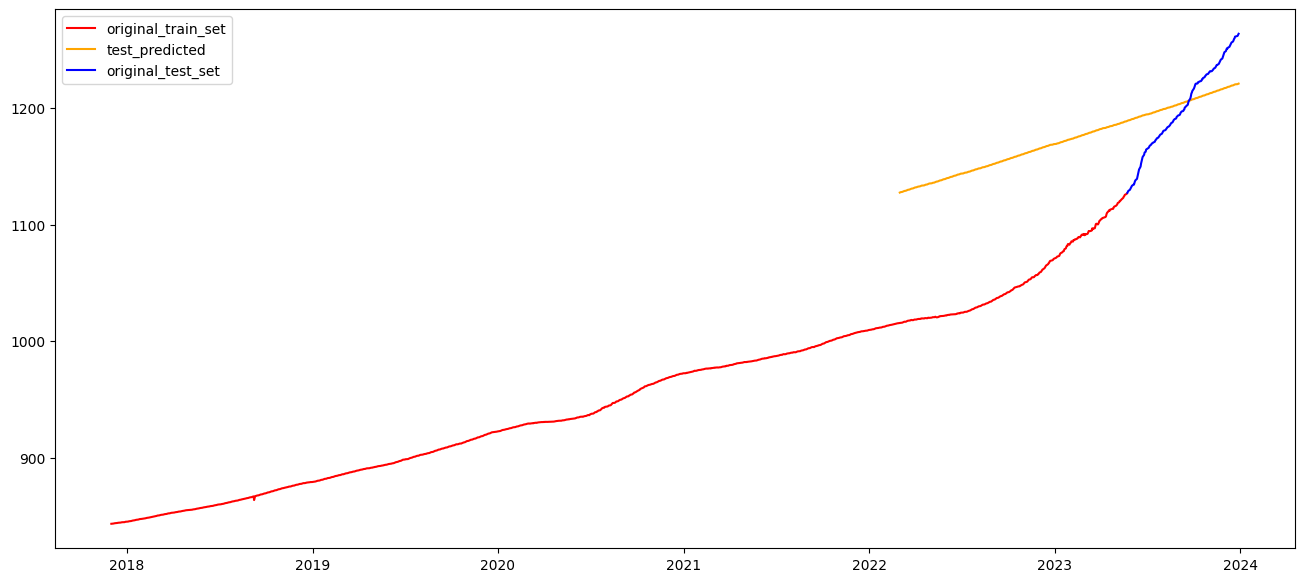

In [99]:
fig, plt.subplots(figsize=(16,7))
plt.plot(y_train_org1, color='red', label='original_train_set')
plt.plot(pred_test_original_scale, color='orange', label='test_predicted')
plt.plot(y_test_org, color='blue', label='original_test_set')
plt.legend(loc='best')

In [102]:
mae_test = mean_absolute_error(y_test_org, pred_test_original_scale)
mae_test

77.21715367023205